In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

import os 
import numpy as np

First open all series (SC, LC and WN) and plot their autocorrelation

In [3]:
ISIseq_path = "/Users/nicolasfarrugia/Dropbox/Manip/Individual_ISI_series/series_manip_512stim/series txt/"

In [4]:
allfiles = os.listdir(ISIseq_path)

In [5]:
SC_files=allfiles[0:75:3]
print("All SC files : ")
print(SC_files)

print("All LC files : ")
LC_files=allfiles[1:75:3]
print(LC_files)

print("All WN files : ")
WN_files=allfiles[2:75:3]
print(WN_files)

All SC files : 
['10_AR1_Series(n512,M2000,CV26).txt', '11_AR1_Series(n512,M2000,CV26).txt', '12_AR1_Series(n512,M2000,CV26).txt', '13_AR1_Series(n512,M2000,CV26).txt', '14_AR1_Series(n512,M2000,CV26).txt', '15_AR1_Series(n512,M2000,CV26).txt', '16_AR1_Series(n512,M2000,CV26).txt', '17_AR1_Series(n512,M2000,CV26).txt', '18_AR1_Series(n512,M2000,CV26).txt', '19_AR1_Series(n512,M2000,CV26).txt', '1_AR1_Series(n512,M2000,CV26).txt', '20_AR1_Series(n512,M2000,CV26).txt', '21_AR1_Series(n512,M2000,CV26).txt', '22_AR1_Series(n512,M2000,CV26).txt', '23_AR1_Series(n512,M2000,CV26).txt', '24_AR1_Series(n512,M2000,CV26).txt', '25_AR1_Series(n512,M2000,CV26).txt', '2_AR1_Series(n512,M2000,CV26).txt', '3_AR1_Series(n512,M2000,CV26).txt', '4_AR1_Series(n512,M2000,CV26).txt', '5_AR1_Series(n512,M2000,CV26).txt', '6_AR1_Series(n512,M2000,CV26).txt', '7_AR1_Series(n512,M2000,CV26).txt', '8_AR1_Series(n512,M2000,CV26).txt', '9_AR1_Series(n512,M2000,CV26).txt']
All LC files : 
['10_OneOverF_Series(n512,

In [15]:
SC_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in SC_files]
LC_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in LC_files]
WN_series = [np.recfromtxt(os.path.join(ISIseq_path,X)) for X in WN_files]


Plot just a few subjects 

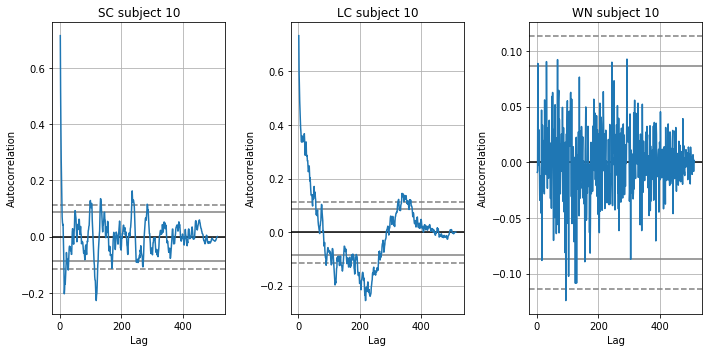

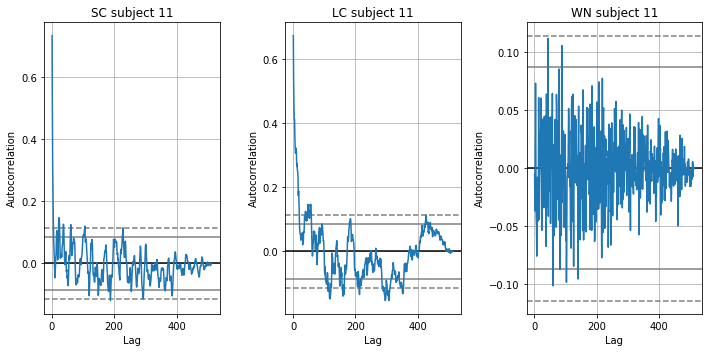

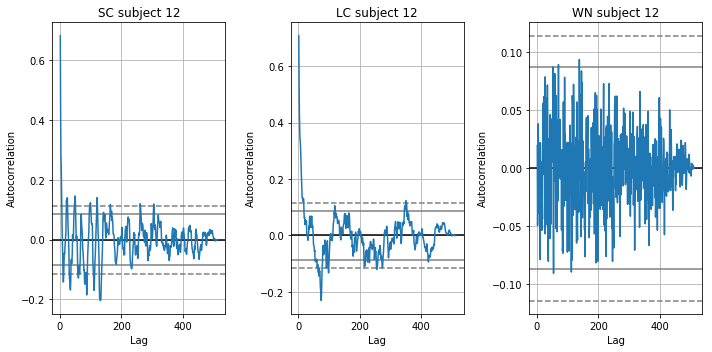

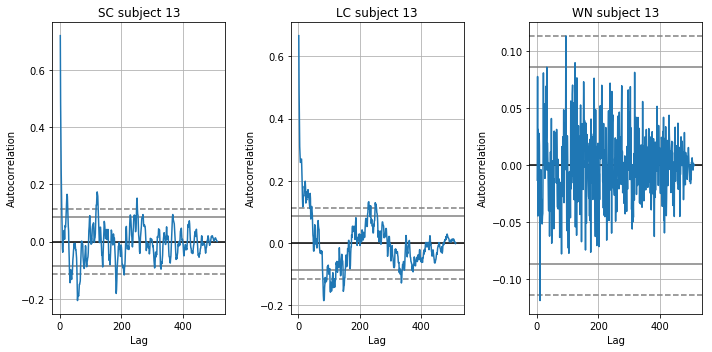

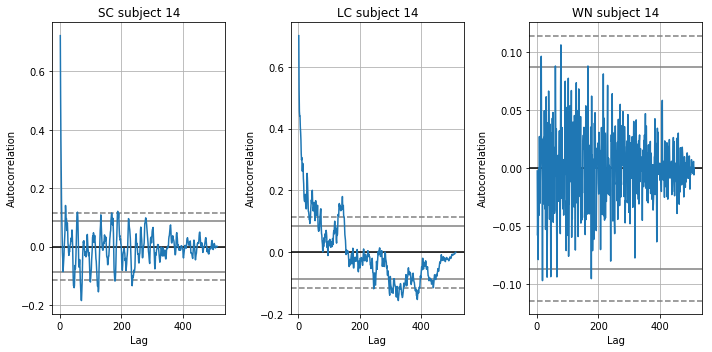

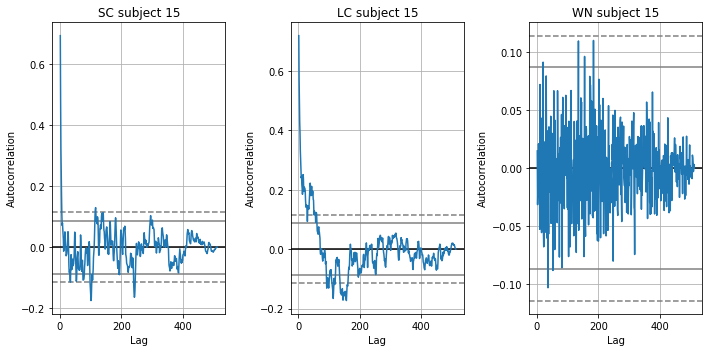

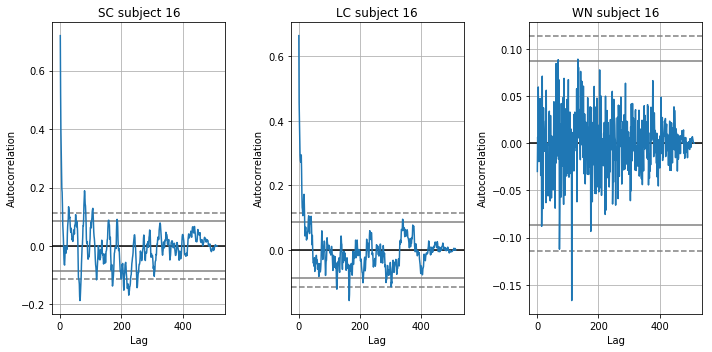

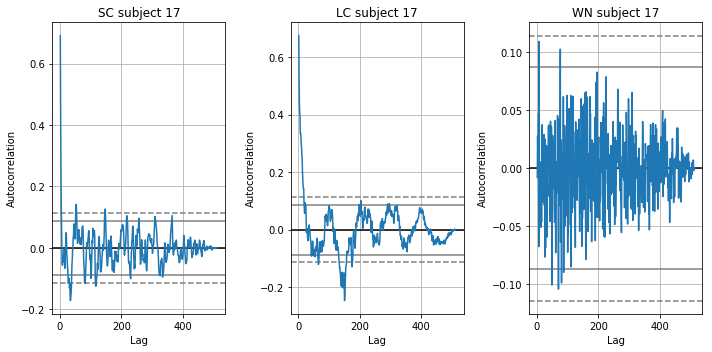

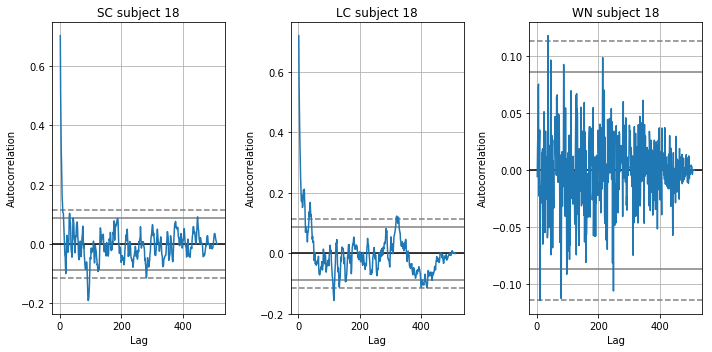

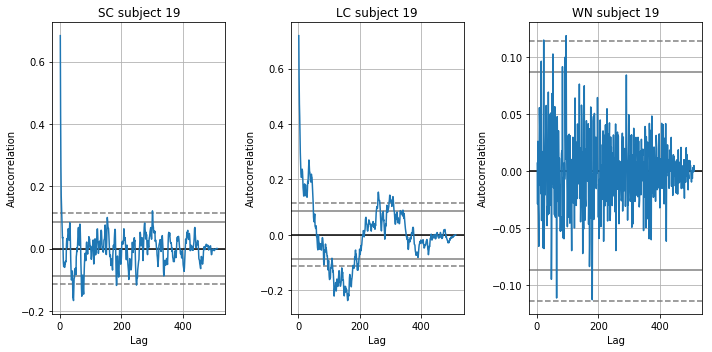

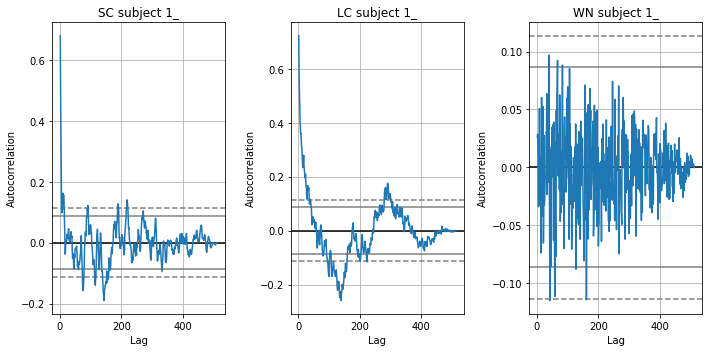

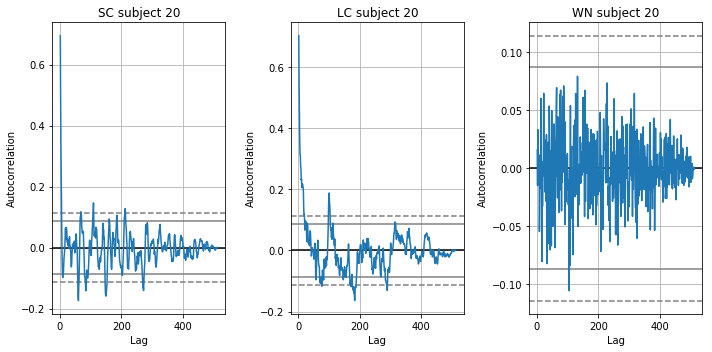

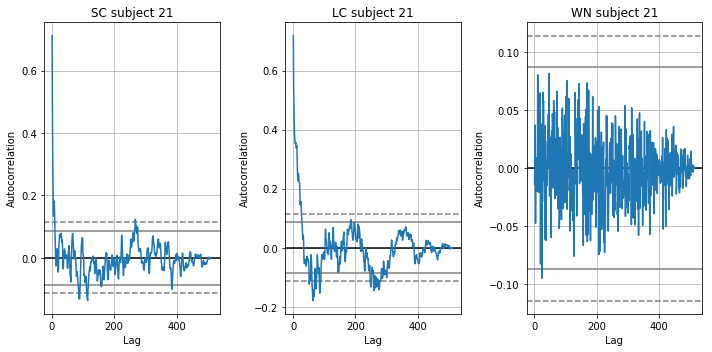

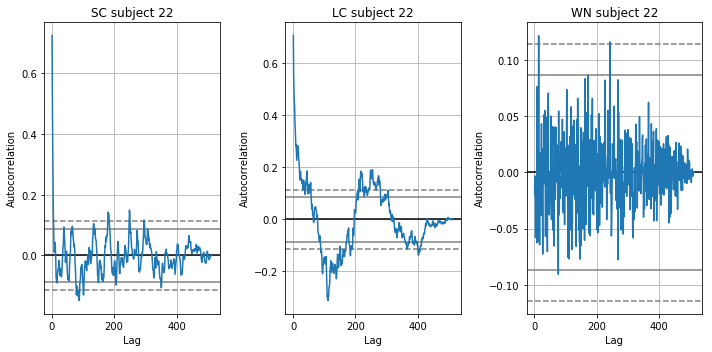

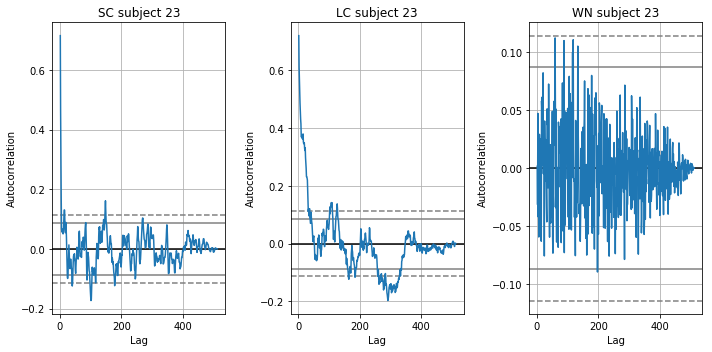

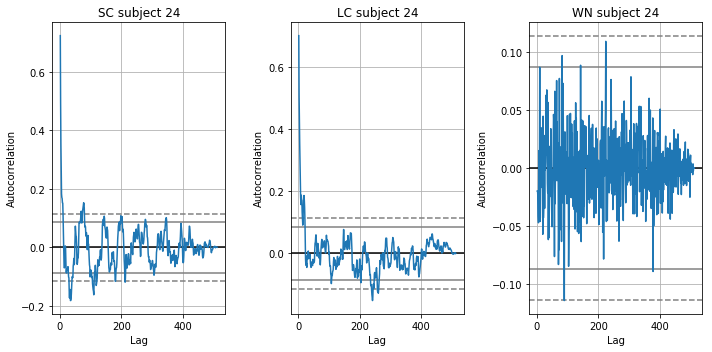

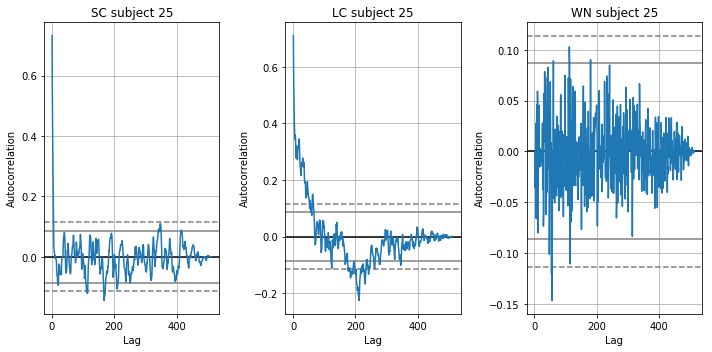

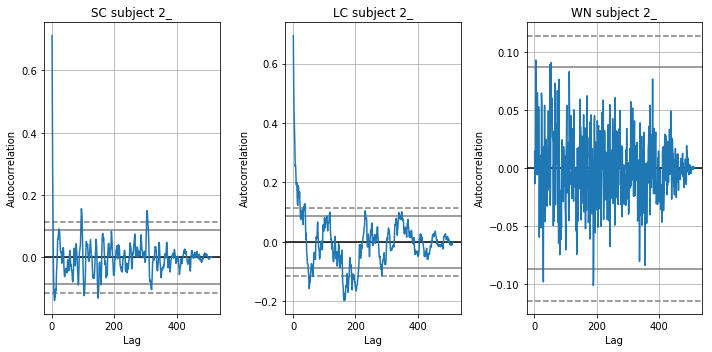

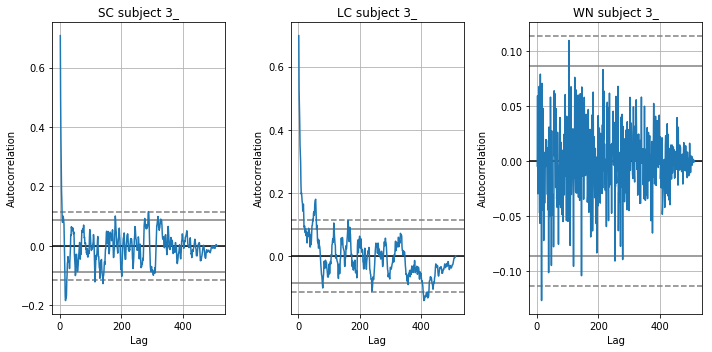

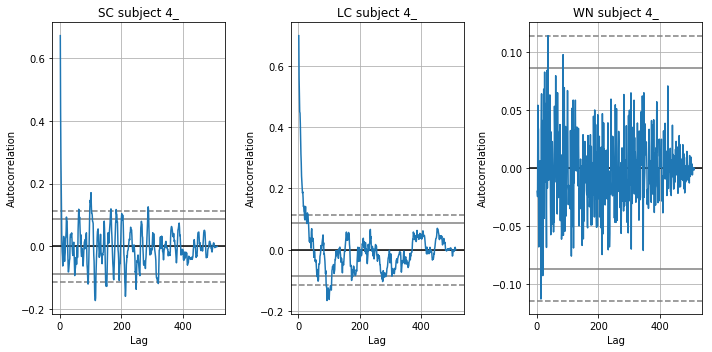

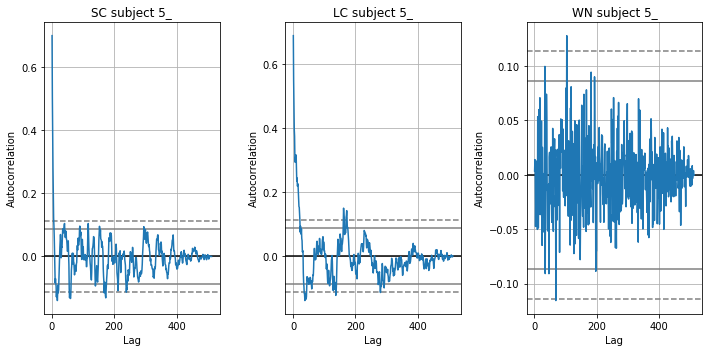

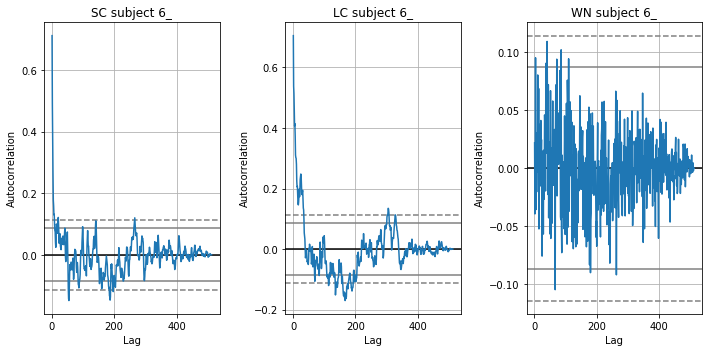

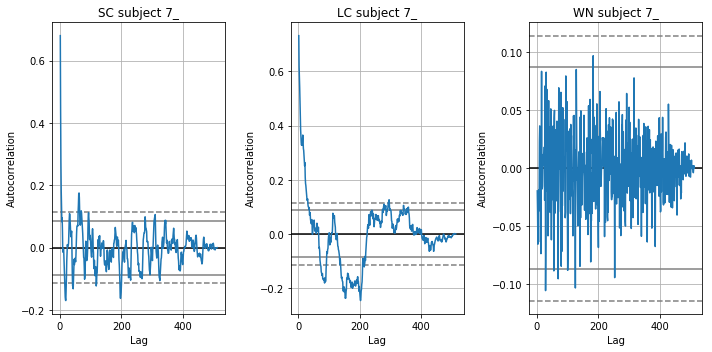

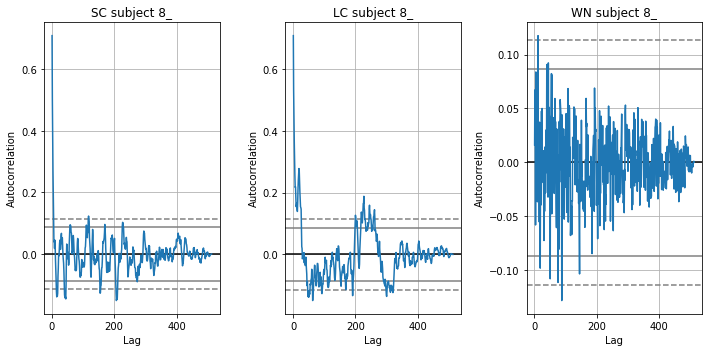

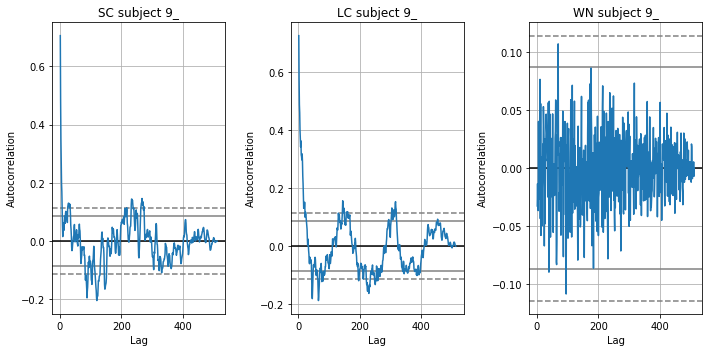

In [50]:
from pandas.tools.plotting import autocorrelation_plot

nbsubjtoplot = 25

for cur_sc,cur_lc,cur_wn,subjnum in zip(SC_series[0:nbsubjtoplot],
                                        LC_series[0:nbsubjtoplot],
                                        WN_series[0:nbsubjtoplot],
                                        SC_files[0:nbsubjtoplot]):
    
    subjid = subjnum[0:2]
    plt.figure(figsize=(10,5))
    
    ax1=plt.subplot(1,3,1)
    autocorrelation_plot(cur_sc,ax1)
    plt.title("SC subject %s" % subjid)
    
    ax2=plt.subplot(1,3,2)
    autocorrelation_plot(cur_lc,ax2)
    plt.title("LC subject %s" % subjid)
    
    ax3=plt.subplot(1,3,3)
    autocorrelation_plot(cur_wn,ax3)
    plt.title("WN subject %s" % subjid)
    
    plt.tight_layout()
    plt.show()

In [110]:
X_train=np.stack(SC_series[0:20]).reshape((20,512,1))
X_test= np.stack(SC_series[20:])

In [113]:
X_train.shape

(20, 512, 1)

Neural Networks using [KERAS](www.keras.io)


In [90]:
import keras.models as models
from keras.layers import Activation,GRU

In [116]:
model = models.Sequential()
model.add(GRU(30,input_shape=(None,1)))

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [118]:
model.fit(X_train,X_train.reshape(20,512))

ValueError: Error when checking model target: expected gru_5 to have shape (None, 30) but got array with shape (20, 512)